In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data_generator import Datagen
from feedforward_network import FeedForwardNet
from residual_network import ResidualNet
from terminal_unicycle import FeedforwardUnicycle, ResidualUnicycle
from ddp_solver import solve_problem
import numpy as np
import torch
import matplotlib.pyplot as plt
from utils import plot_trajectories
import crocoddyl

In [3]:
class zeroCostUnicycle(crocoddyl.ActionModelAbstract):
    """
    This includes a feedforward network in crocoddyl
    
    """
    def __init__(self):
        crocoddyl.ActionModelAbstract.__init__(self, crocoddyl.StateVector(3), 2, 5)
        

    def calc(self, data, x, u=None):
        data.cost = 0.
        
        
                      


    def calcDiff(self, data, x, u=None):
        
        data.Lx = np.array([0., 0., 0.])
        
        data.Lxx = np.array([[0., 0., 0.],[0., 0., 0.], [0., 0., 0.]])


In [42]:
def values(dataset):
    y_data = []
    for data in dataset:
        terminal = zeroCostUnicycle()
        model = crocoddyl.ActionModelUnicycle()
        model.costWeights =  np.matrix([1.,1.]).T  
        problem = crocoddyl.ShootingProblem(data.T, [model]*30, terminal)
        ddp = crocoddyl.SolverDDP(problem)
        ddp.solve([], [], 1000)
        y_data.append(ddp.cost)
        
    return y_data

In [4]:
grid_data = Datagen.grid_data(size=100)

In [44]:
vals = values(grid_data)

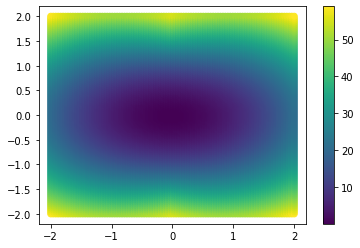

In [45]:
plt.scatter(grid_data[:,0], grid_data[:,1], c=vals)
plt.colorbar()

In [6]:
model = crocoddyl.ActionModelUnicycle()
model.costWeights =  np.matrix([1.,1.]).T  
problem = crocoddyl.ShootingProblem(grid_data[0].T, [model]*30, model)
ddp = crocoddyl.SolverDDP(problem)
ddp.solve([], [], 1000)

True

In [8]:
ddp.cost

59.33185289316866

In [33]:
cost = []
for d in ddp.problem.runningDatas:
    print(d.cost)
    cost.append(d.cost)
cost.append(ddp.problem.terminalData.cost)

7.079270464617698
6.641363843914558
6.088191998632231
5.4440596455291805
4.773631425941976
4.128446422424867
3.5372666887318656
3.0118265837278972
2.553890252977167
2.1601560111687395
1.8250973143265317
1.5424538240364458
1.3059532518313661
1.10962989944742
0.9479486911400044
0.8158458707931083
0.7087400744462945
0.622535018546892
0.5536182970261895
0.49885399435914746
0.45556591426169635
0.4215100910744728
0.3948377073105433
0.37405135251683036
0.357958313675769
0.3456244135924192
0.3363311718619363
0.329538121528424
0.3248512374350889
0.32199775710176104


In [34]:
len(cost)

31

In [37]:
for i,j in enumerate(cost):
    j = j + sum(cost[i+1:])
    cost[i] = j

In [38]:
cost

[59.33185289316866,
 52.252582428550966,
 45.6112185846364,
 39.523026586004164,
 34.078966940474984,
 29.305335514533006,
 25.17688909210814,
 21.639622403376265,
 18.627795819648377,
 16.073905566671208,
 13.913749555502472,
 12.088652241175941,
 10.546198417139493,
 9.24024516530813,
 8.13061526586071,
 7.182666574720706,
 6.366820703927598,
 5.658080629481303,
 5.0355456109344106,
 4.481927313908221,
 3.9830733195490726,
 3.5275074052873774,
 3.1059973142129045,
 2.711159606902361,
 2.3371082543855306,
 1.9791499407097615,
 1.6335255271173423,
 1.2971943552554057,
 0.9676562337269818,
 0.6428049962918929,
 0.32080723919013193]